In [131]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm
from dc_regression import dc_regression

In [141]:
# Data
n = 100
dim = 2
sigma = 0.25

pi = 3.14159265
X = np.random.rand(n, dim)
y = np.sin(3*pi*X[:,0]) + np.cos(3*pi*X[:,np.minimum(dim-1,1)]) + 3*np.log(np.abs(3*pi*X[:,0]+3*pi*X[:,np.minimum(dim-1,1)])+1)
y += sigma*np.random.randn(n)

In [142]:
# Fitting
model = dc_regression()
model.fit(X,y)

100%|██████████| 9/9 [00:03<00:00,  2.62it/s]


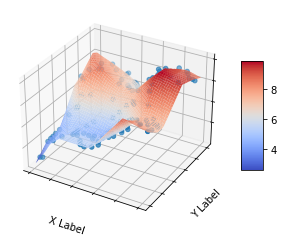

In [143]:
# Plotting
d_mesh = 0.01

X_mesh = np.arange(np.min(X[:,0]), np.max(X[:,0]), d_mesh)
if dim == 1:
    X_mesh_all = X_mesh.reshape(-1,1)
else:
    Y_mesh = np.arange(np.min(X[:,1]), np.max(X[:,1]), d_mesh)
    X_mesh, Y_mesh = np.meshgrid(X_mesh, Y_mesh)
    X_mesh_all = np.concatenate((X_mesh.reshape(-1,1),Y_mesh.reshape(-1,1)), axis=1)

if dim > 2:
    X_mesh_all = np.concatenate((X_mesh_all, np.zeros([X_mesh_all.shape[0], dim-2])), axis=1)

f_hat_mesh = model.predict(X_mesh_all).reshape(X_mesh.shape)

# Plot the surface.
if dim == 1:
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(X_mesh, f_hat_mesh)
    ax.scatter(X, y)
else:
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X_mesh, Y_mesh, f_hat_mesh, cmap = cm.coolwarm)
    ax.scatter(X[:,0],X[:,1],y)
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.set_zlabel('Z Label')
    ax.set_zticklabels([])

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

# Turn off tick labels
ax.set_yticklabels([])
ax.set_xticklabels([])

plt.show()